In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

def extract_party_name(soup):
    # Extract the party name from the span element
    span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)
    if span:
        party_name = span.text.split("(")[-1].split(")")[0].strip()
        return party_name
    return "Unknown"

def generate_excel_from_urls(url_filename_pairs, combined_filename):
    all_dfs = []
    for url, filename in url_filename_pairs:
        response = requests.get(url)
        html_content = response.content
        soup = BeautifulSoup(html_content, "html.parser")
        party_name = extract_party_name(soup)
        table = soup.find("table", class_="table")

        if table:
            dfs = pd.read_html(StringIO(str(table)))

            if dfs:
                df = dfs[0]
                df["Winning Party"] = party_name  # Add the new column with the party name
                df.to_excel(filename, index=False)
                all_dfs.append(df)
                print(f"Excel file generated successfully: {filename}")
            else:
                print(f"No tables found on the webpage for URL: {url}")
        else:
            print(f"Table not found on the webpage for URL: {url}")

    # Combine all dataframes into a single DataFrame
    combined_df = pd.concat(all_dfs, ignore_index=True)
    # Write the combined DataFrame to a single sheet in the Excel file
    combined_df.to_excel(combined_filename, sheet_name='Combined', index=False)

    print(f"Combined Excel file generated successfully: {combined_filename}")

# List of URLs, party names, and filenames for individual Excel files
url_partyname_filename_pairs = [
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-369.htm","table1_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-742.htm", "table2_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1680.htm", "table3_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-140.htm", "table4_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-582.htm", "table5_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1745.htm", "table6_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-805.htm", "table7_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3369.htm", "table8_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3620.htm", "table9_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3529.htm", "table10_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3165.htm", "table11_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1888.htm", "table12_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1420.htm",  "table13_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-547.htm",  "table14_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-772.htm",  "table15_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1.htm", "table16_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-852.htm",  "table17_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-860.htm",  "table18_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-545.htm", "table19_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-804.htm", "table20_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1847.htm", "table21_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-544.htm",  "table22_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1458.htm", "table23_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-834.htm",  "table24_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1998.htm","table25_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-83.htm", "table26_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-664.htm",  "table27_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-911.htm", "table28_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1534.htm", "table29_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1142.htm",  "table30_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3388.htm",  "table31_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-2757.htm",  "table32_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1584.htm","table33_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-2484.htm", "table34_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3482.htm","table35_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1658.htm","table36_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1046.htm","table37_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-2989.htm","table38_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-2070.htm","table39_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-160.htm","table40_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-118.htm", "table41_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-743.htm", "table42_report.xlsx"),
]
combined_filename = "DataSet.xlsx"
generate_excel_from_urls(url_partyname_filename_pairs, combined_filename)


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table1_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table2_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table3_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table4_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table5_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table6_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table7_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table8_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table9_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table10_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table11_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table12_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table13_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table14_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table15_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table16_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table17_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table18_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table19_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table20_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table21_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table22_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table23_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table24_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table25_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table26_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table27_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table28_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table29_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table30_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table31_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table32_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table33_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table34_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table35_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table36_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table37_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table38_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table39_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table40_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table41_report.xlsx
Excel file generated successfully: table42_report.xlsx
Combined Excel file generated successfully: combined_report.xlsx


<ipython-input-1-c7d7bd79815e>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Index(['S.No', 'Parliament Constituency', 'Winning Candidate', 'Total Votes',
       'Margin', 'Winning Party'],
      dtype='object')
['Bharatiya Janata Party' 'Indian National Congress' 'Samajwadi Party'
 'All India Trinamool Congress' 'Dravida Munnetra Kazhagam' 'Telugu Desam'
 'United' 'Uddhav Balasaheb Thackrey'
 'Nationalist Congress Party – Sharadchandra Pawar' 'Shiv Sena'
 'Ram Vilas' 'Yuvajana Sramika Rythu Congress Party'
 'Rashtriya Janata Dal' 'Marxist' 'Indian Union Muslim League'
 'Aam Aadmi Party' 'Jharkhand Mukti Morcha' 'Janasena Party' 'Liberation'
 'Secular' 'Viduthalai Chiruthaigal Katchi' 'Communist Party of India'
 'Rashtriya Lok Dal' 'Jammu & Kashmir National Conference'
 'United People’s Party, Liberal' 'Asom Gana Parishad' 'Kerala Congress'
 'Revolutionary Socialist Party' 'Nationalist Congress Party'
 'Voice of the People Party' 'Zoram People’s Movement'
 'Shiromani Akali Dal' 'Rashtriya Loktantrik Party' 'Bharat Adivasi Party'
 'Sikkim Krantikari Morcha' 'Mar

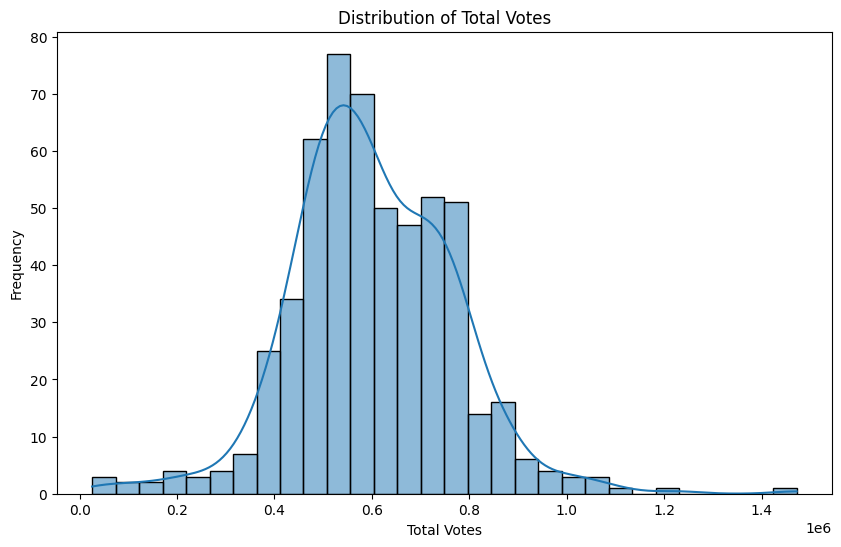

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/combined_report.xlsx'
dp = pd.read_excel(file_path)
print(dp.columns)
if 'S.No' in dp.columns:
    dp = dp.drop(columns=['S.No'])

# Checking for unique values in the 'Winning Party' column
print(dp['Winning Party'].unique())

# Converting columns to appropriate data types
dp['Total Votes'] = pd.to_numeric(dp['Total Votes'], errors='coerce')
dp['Margin'] = pd.to_numeric(dp['Margin'], errors='coerce')

# Checking for non-numeric data and handle missing values if needed
dp = dp.dropna(subset=['Total Votes', 'Margin'])

# 1. Distribution of Total Votes
plt.figure(figsize=(10, 6))
sns.histplot(dp['Total Votes'], kde=True, bins=30)
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.show()



# ***The distribution of total votes shows that most constituencies have a moderate number of votes, with a few having exceptionally high vote counts.***

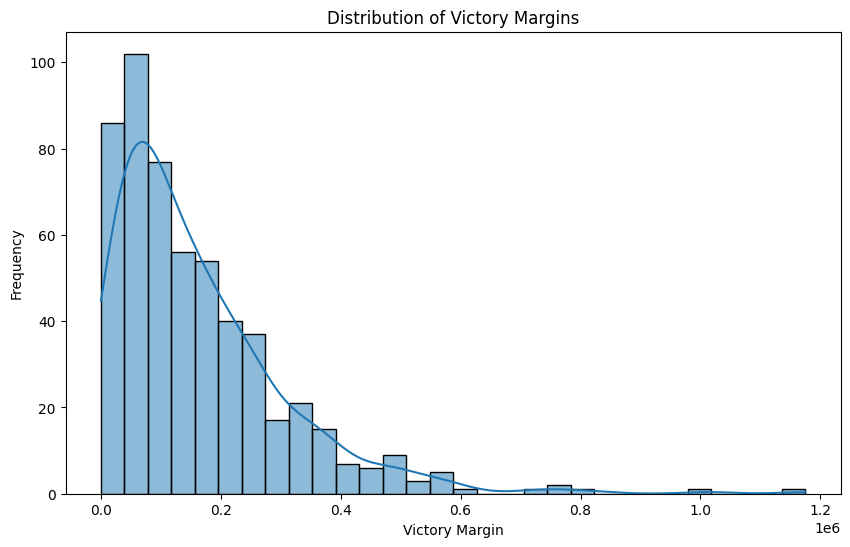

In [13]:
# 2. Distribution of Victory Margins
plt.figure(figsize=(10, 6))
sns.histplot(dp['Margin'], kde=True, bins=30)
plt.title('Distribution of Victory Margins')
plt.xlabel('Victory Margin')
plt.ylabel('Frequency')
plt.show()

# ***The victory margins also follow a similar distribution, with most constituencies having moderate margins and a few with very high margins.***

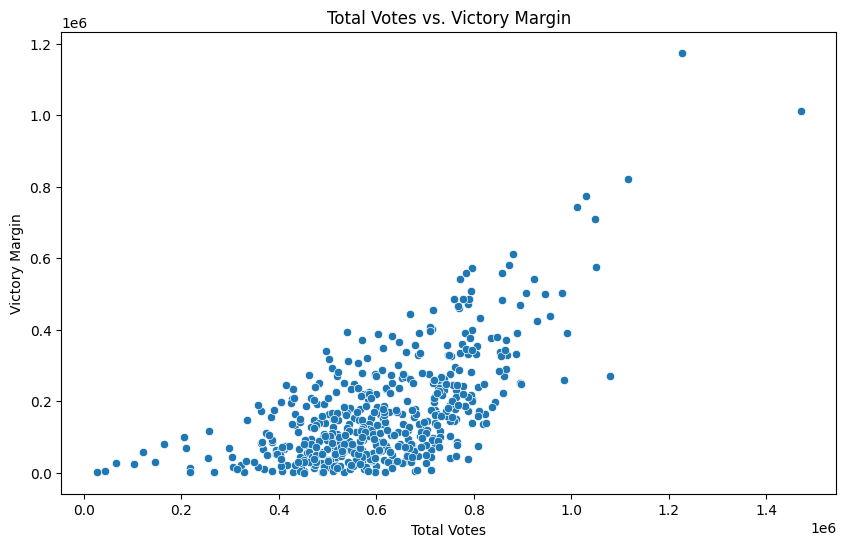

In [14]:
# 3. Total Votes vs. Victory Margin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Votes', y='Margin', data=dp)
plt.title('Total Votes vs. Victory Margin')
plt.xlabel('Total Votes')
plt.ylabel('Victory Margin')
plt.show()

# ***There is a positive correlation between the total votes and the victory margin, indicating that higher total votes tend to result in larger victory margins.***

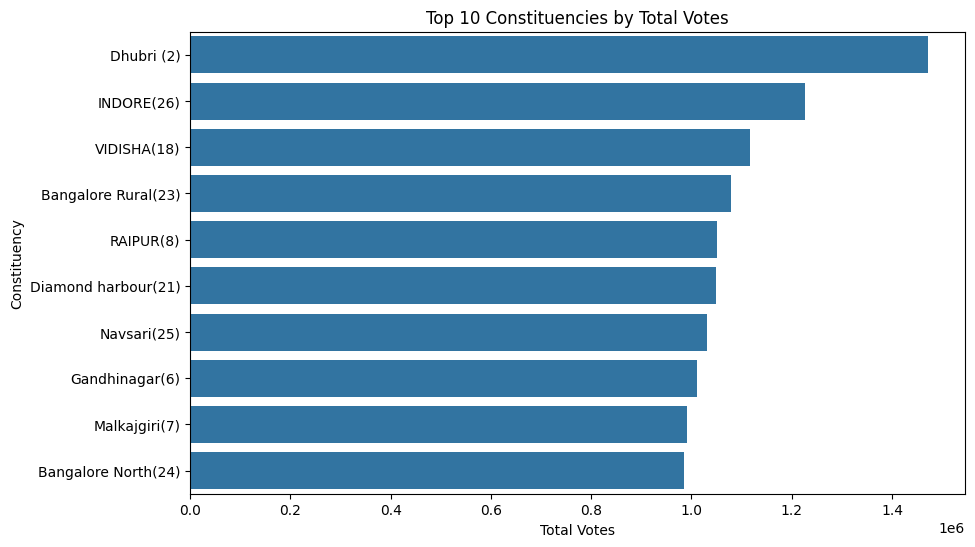

In [15]:
# 4. Top 10 Constituencies by Total Votes
top_10_votes = dp.nlargest(10, 'Total Votes')
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Votes', y='Parliament Constituency', data=top_10_votes)
plt.title('Top 10 Constituencies by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Constituency')
plt.show()

# ***The top 10 constituencies by total votes and victory margins highlight the areas(Dhubri,Indore...) with the highest electoral engagement and competitiveness.***

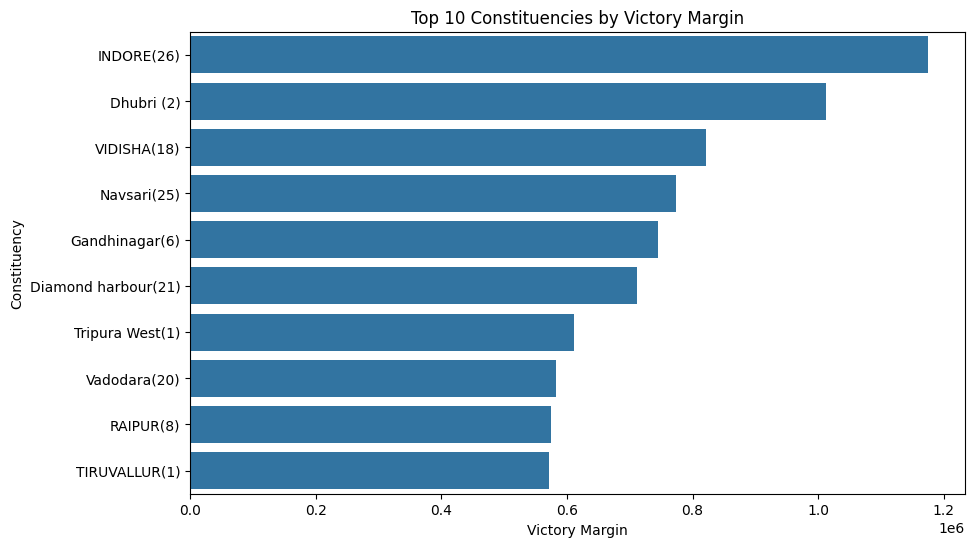

In [16]:
# 5. Top 10 Constituencies by Victory Margin
top_10_margin = dp.nlargest(10, 'Margin')
plt.figure(figsize=(10, 6))
sns.barplot(x='Margin', y='Parliament Constituency', data=top_10_margin)
plt.title('Top 10 Constituencies by Victory Margin')
plt.xlabel('Victory Margin')
plt.ylabel('Constituency')
plt.show()

# ***These Majority Victory Margin shows that a clear information that there is great participation in voting and clear sights of electing a good leader.***

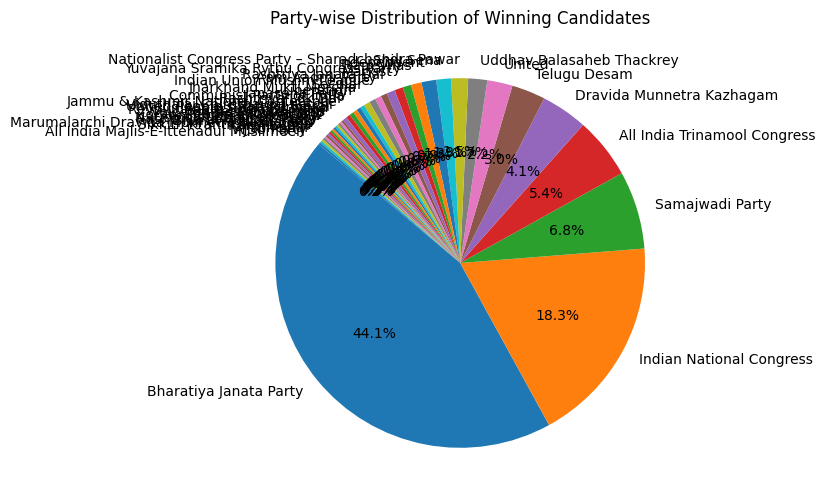

In [17]:
# 6. Party-wise Distribution of Winning Candidates
plt.figure(figsize=(10, 6))
dp['Winning Party'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Party-wise Distribution of Winning Candidates')
plt.ylabel('')
plt.show()


# ***The Bharatiya Janata Party (BJP) dominates the election, as shown by the party-wise distribution of winning candidates.***

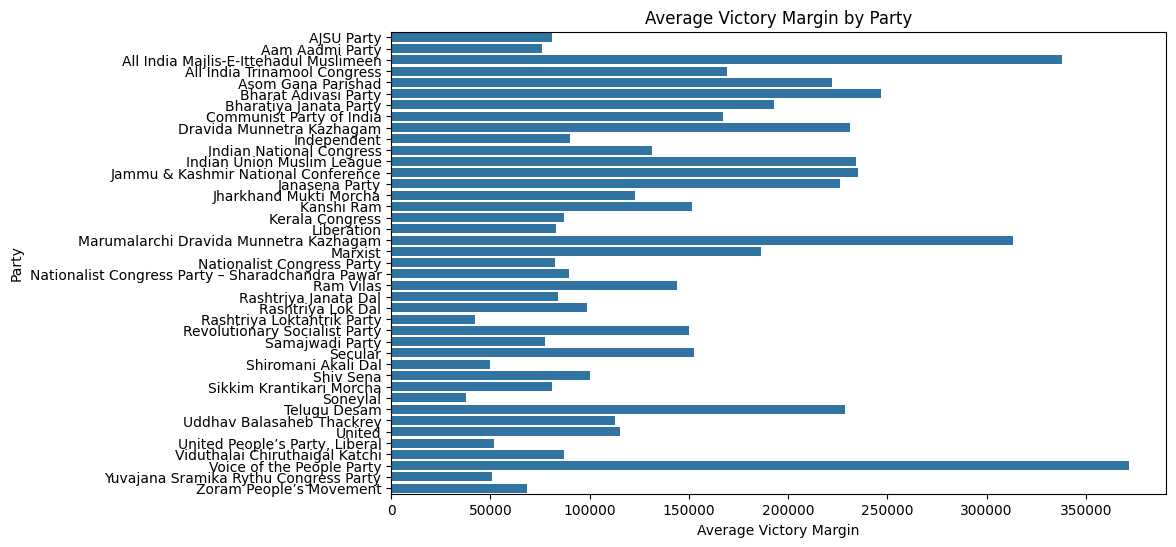

In [18]:
# 7. Average Victory Margin by Party
avg_margin_by_party = dp.groupby('Winning Party')['Margin'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Margin', y='Winning Party', data=avg_margin_by_party)
plt.title('Average Victory Margin by Party')
plt.xlabel('Average Victory Margin')
plt.ylabel('Party')
plt.show()

# ***The average victory margin by party reveals that BJP has a higher average margin compared to other parties, indicating strong voter support.***

In [19]:
# 8. Correlation between Total Votes and Victory Margin
correlation = dp['Total Votes'].corr(dp['Margin'])
print(f'Correlation between Total Votes and Victory Margin: {correlation}')

Correlation between Total Votes and Victory Margin: 0.6583371611793221


# ***There is Postive Correlation between Total votes casted and Margin of victory.***

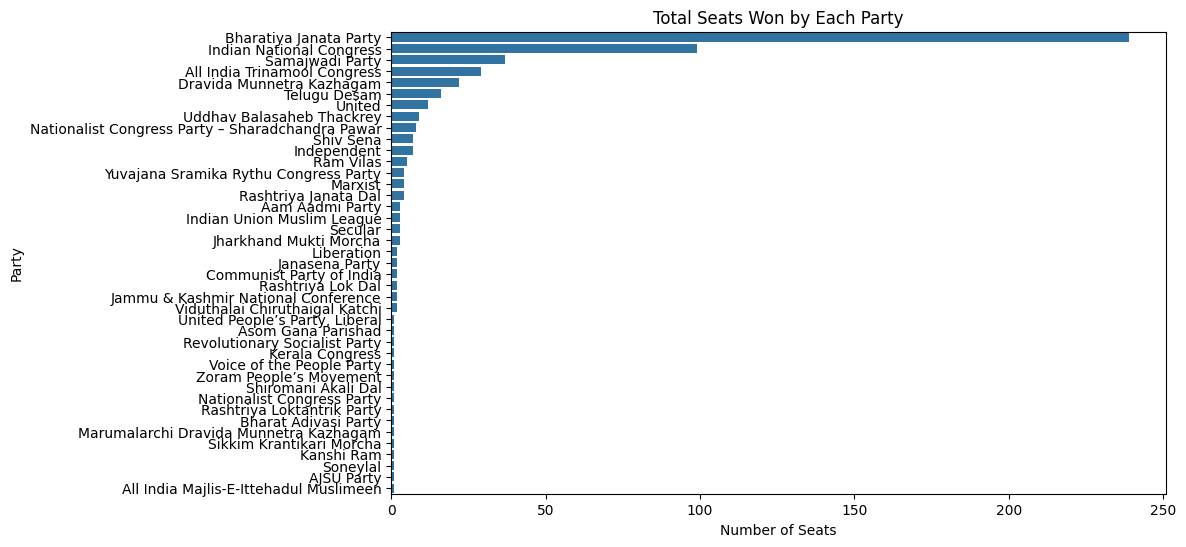

In [26]:
# 9. Total Seats Won by Each Party
plt.figure(figsize=(10, 6))
sns.countplot(y='Winning Party', data=dp, order=dp['Winning Party'].value_counts().index)
plt.title('Total Seats Won by Each Party')
plt.xlabel('Number of Seats')
plt.ylabel('Party')
plt.show()

# ***As we can observe Bharatiya Janata Party (BJP) has won many seats it may become the ruling party.***

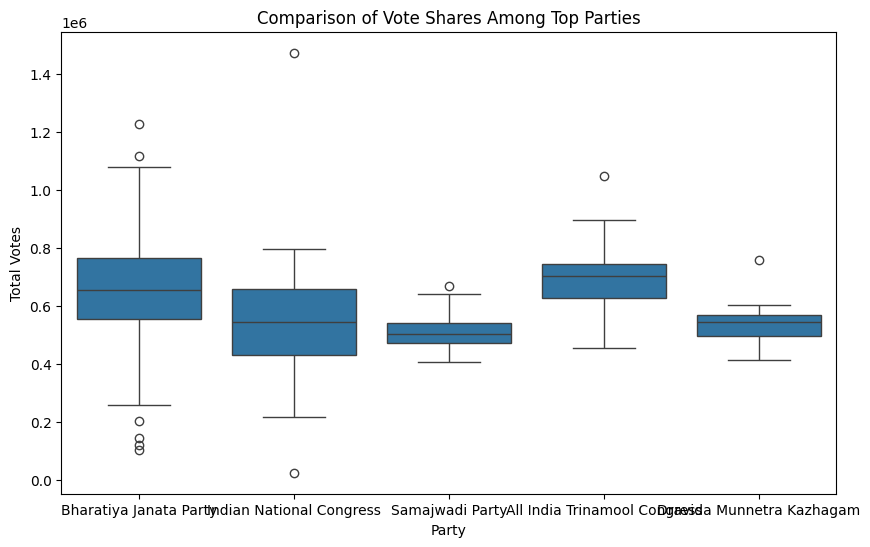

In [23]:
# 10. Comparison of Vote Shares Among Top Parties
top_parties = dp['Winning Party'].value_counts().nlargest(5).index
filtered_data = dp[dp['Winning Party'].isin(top_parties)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Winning Party', y='Total Votes', data=filtered_data)
plt.title('Comparison of Vote Shares Among Top Parties')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.show()

# ***The comparison of vote shares among the top parties shows significant variation in total votes received by different parties.***

In [29]:
highest_majority_candidate = dp.loc[dp['Margin'].idxmax()]
print("Candidate with the Highest Majority:")
print(f"Parliament Constituency: {highest_majority_candidate['Parliament Constituency']}")
print(f"Winning Candidate: {highest_majority_candidate['Winning Candidate']}")
print(f"Total Votes: {highest_majority_candidate['Total Votes']}")
print(f"Margin: {highest_majority_candidate['Margin']}")
print(f"Winning Party: {highest_majority_candidate['Winning Party']}")

Candidate with the Highest Majority:
Parliament Constituency: INDORE(26)
Winning Candidate: SHANKAR LALWANI
Total Votes: 1226751.0
Margin: 1175092.0
Winning Party: Bharatiya Janata Party


# ***SHANKAR LALWANI has highest Majority in elections.***